<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


**Ques: For the "Median value of owner-occupied homes" provide a boxplot**

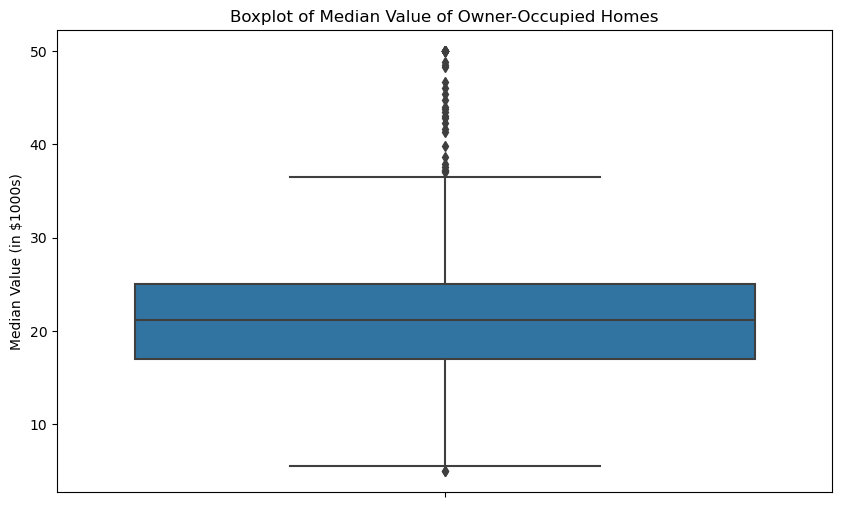

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])  # Assuming 'MEDV' is the column name for median value
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value (in $1000s)')
plt.show()

**Ques: Provide a  bar plot for the Charles river variable**

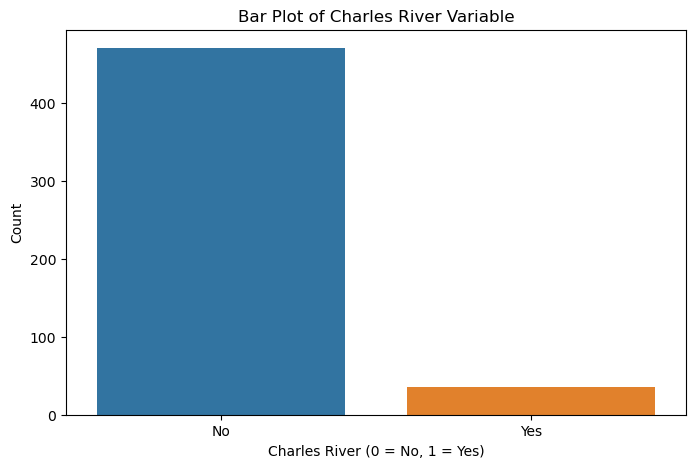

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='CHAS', data=boston_df)  # Assuming 'CHAS' is the column name for Charles River
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

**Ques: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

**Explanation: To create a boxplot for the MEDV variable versus the AGE variable, while discretizing the AGE variable into three groups (35 years and younger, between 35 and 70 years, and 70 years and older), you can follow these steps using Python with Pandas and Seaborn**


In [7]:
#Discretize the AGE Variable:
bins = [0, 35, 70, float('inf')]
labels = ['35 and younger', '35 to 70', '70 and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

C:\Users\Anusuya\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


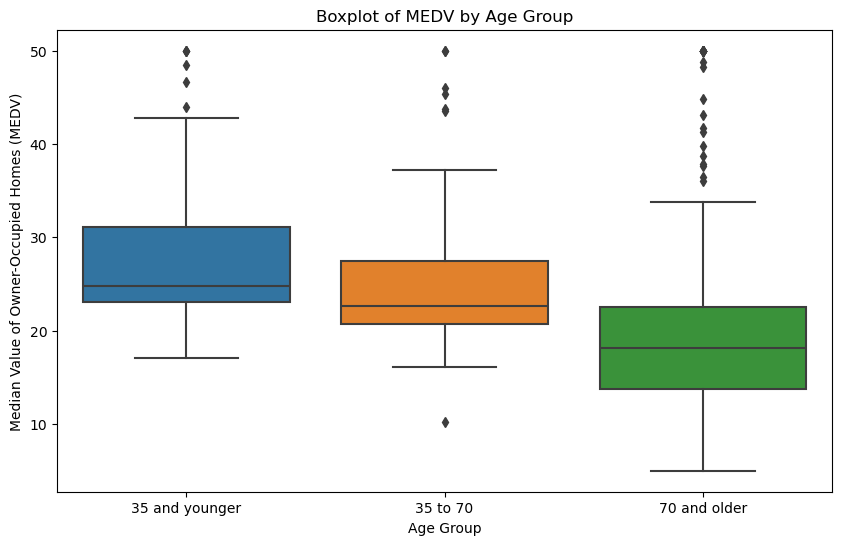

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.show()

**Explanation of Findings
Boxplot Interpretation:
The x-axis represents the different age groups.
The y-axis shows the median value of owner-occupied homes (MEDV).
Each box represents the interquartile range (IQR) for the MEDV values within each age group, with the line inside the box indicating the median.
This visualization allows you to compare the distribution of home values across different age groups, highlighting any differences in median values and the presence of outliers**

**Ques: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

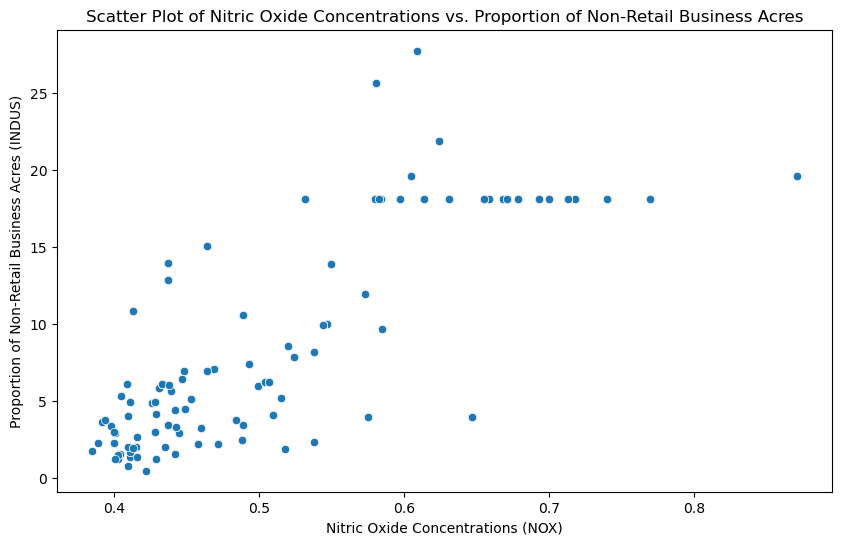

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)  # Assuming 'NOX' is for Nitric oxide and 'INDUS' for non-retail business acres
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()

**Explanation of Findings

Scatter Plot Interpretation:
The x-axis represents Nitric oxide concentrations (NOX).
The y-axis represents the proportion of non-retail business acres per town (often represented as INDUS).
Each point on the scatter plot represents a town, showing the relationship between these two variables.
Relationship Insghts

Positive or Negative Correlation:
If the points tend to rise together (upward trend), it indicates a positive correlation; as one variable increases, so does the other.
If the points tend to fall together (downward trend), it indicates a negative correlation; as one variable increases, the other decreases.
If the points are scattered without a clear trend, it suggests no correlation.
By analyzing the scatter plot, you can draw conclusions about how Nitric oxide concentrations relate to the proportion of non-retail business acres **n the towns.

**Ques:Create a histogram for the pupil to teacher ratio variable**

C:\Users\Anusuya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


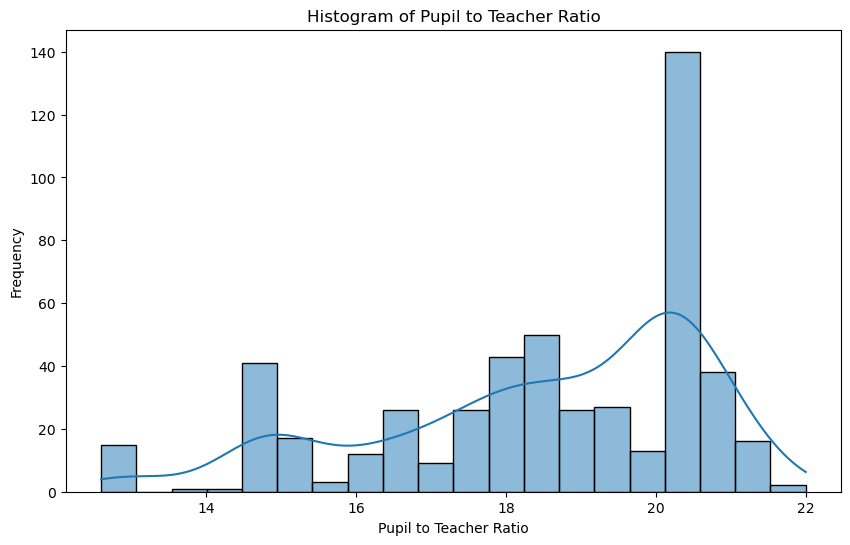

In [10]:
# teacher student ratio
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)  # Assuming 'PTRATIO' is the column name for pupil-to-teacher ratio
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

**Ques:Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

In [12]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

from scipy import stats

# Sample data: replace these with your actual data
median_bounded_by_river = boston_df[boston_df['CHAS'] == 1]['MEDV'].median()
median_notbounded_by_river = boston_df[boston_df['CHAS'] == 0]['MEDV'].median()
# Create a DataFrame
#df = pd.DataFrame(data)

# Perform the T-test
t_statistic, p_value = stats.ttest_ind(median_bounded_by_river, median_notbounded_by_river)

# Output the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median values.")

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference in median values.


C:\Users\Anusuya\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


**Ques: 
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

In [14]:
#df = pd.DataFrame(data)

# Group the data by AGE
grouped_data = [group['MEDV'].values for name, group in boston_df.groupby('AGE')]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Output the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median values.")

F-statistic: 0.9840091646131598
P-value: 0.5539698276810188
Fail to reject the null hypothesis: No significant difference in median values.


**Ques:Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

In [15]:
# Calculate Pearson correlation
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Output the results
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")

Correlation Coefficient: 0.7636514469209149
P-value: 7.913361061242812e-98
Reject the null hypothesis: There is a significant correlation.


**Ques: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**.

**Explanation :Null Hypothesis (H0): The additional weighted distance to the employment centers has no significant impact on the median value of owner-occupied homes (coefficient = 0).
Alternative Hypothesis (H1): The additional weighted distance to the employment centers has a significant impact on the median value of owner-occupied homes (coefficient ≠ 0).**

In [16]:
#regression analysis
# Define the independent variable (X) and dependent variable (y)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        21:51:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Explanation: Coefficient of 1.0916 shows increase by 1.0916 unit of distance will increase the MEDV by 1p value is <0.05. So, we reject the null hypothesis. Additional weighted distance has an impact**.